# Vaccine Adverse Event Reporting System (VAERS) 

Is a national early warning system to detect possible safety problems in U.S. licensed vaccines. VAERS is co-managed by the Centers for Disease Control and Prevention (CDC) and the U.S. Food and Drug Administration (FDA).

# 1. Problem Definition

# Data

The data came from the Centers for Disease Control and Prevention (CDC) WONDER database: https://wonder.cdc.gov/

# 4. Features

The U.S. Department of Health and Human Services provides a PDF VAERS Data Use Guide, which can be accessed through: https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf.

This project will utilize the fields of the VAERSDATA.CSV (2020).

### VAERS Data Dictionary (VAERSDATA.CSV)

<p style="text-align: center;"> <b>4.1 VAERS Data Description</b> </p>
<img src="img/vaers-data-dictionary1.png" height="600px" width="600px"/>

<p style="text-align: center;"> <b>4.2 VAERS Data Description</b> </p>
<img src="img/vaers-data-dictionary2.png" height="600px" width="600px"/>

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import folium
import os

In [201]:
df = pd.read_csv("data/2020VAERSDATA.csv")
df.head().T

,0,1,2,3,4
VAERS_ID,855017,855018,855019,855020,855021
RECVDATE,01/01/2020,01/01/2020,01/01/2020,01/01/2020,01/01/2020
STATE,HI,WI,NaN,TX,NaN
AGE_YRS,55,68,50,67,73
CAGE_YR,55,68,50,67,73
CAGE_MO,NaN,NaN,NaN,NaN,NaN
SEX,F,F,F,F,F
RPT_DATE,NaN,NaN,NaN,NaN,NaN
SYMPTOM_TEXT,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...",SORENESS IN THE AREA. ITCHING AND RASH,"sore arm, fever 101 , chills, and aching musc...",Patient presented to Clinic today 1/1/2020. Sh...
DIED,NaN,NaN,NaN,NaN,NaN


In [202]:
# Length of the dataframe

len(df)

43588

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      43588 non-null  int64  
 1   RECVDATE      43588 non-null  object 
 2   STATE         37643 non-null  object 
 3   AGE_YRS       33260 non-null  float64
 4   CAGE_YR       31900 non-null  float64
 5   CAGE_MO       2679 non-null   float64
 6   SEX           43588 non-null  object 
 7   RPT_DATE      920 non-null    object 
 8   SYMPTOM_TEXT  43584 non-null  object 
 9   DIED          166 non-null    object 
 10  DATEDIED      93 non-null     object 
 11  L_THREAT      312 non-null    object 
 12  ER_VISIT      165 non-null    object 
 13  HOSPITAL      1583 non-null   object 
 14  HOSPDAYS      673 non-null    float64
 15  X_STAY        27 non-null     object 
 16  DISABLE       915 non-null    object 
 17  RECOVD        40303 non-null  object 
 18  VAX_DATE      38111 non-nu

In [204]:
df.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,43588.000000,33260.000000,31900.000000,2679.000000,673.000000,34433.000000,43588.000000
mean,884566.419313,44.223211,44.321724,0.301530,7.264487,27.674731,1.977746
std,16881.281157,24.570201,24.830733,0.255034,21.157112,634.295519,0.147510
min,855017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,870437.750000,25.000000,25.000000,0.100000,1.000000,0.000000,2.000000
50%,884503.500000,50.000000,51.000000,0.300000,3.000000,0.000000,2.000000
75%,897969.250000,65.000000,65.000000,0.500000,6.000000,1.000000,2.000000
max,918442.000000,115.000000,117.000000,1.000000,365.000000,31011.000000,2.000000


In [205]:
# Sum of rows without values

empty_rows = df.isna().sum()
empty_rows

VAERS_ID            0
RECVDATE            0
STATE            5945
AGE_YRS         10328
CAGE_YR         11688
CAGE_MO         40909
SEX                 0
RPT_DATE        42668
SYMPTOM_TEXT        4
DIED            43422
DATEDIED        43495
L_THREAT        43276
ER_VISIT        43423
HOSPITAL        42005
HOSPDAYS        42915
X_STAY          43561
DISABLE         42673
RECOVD           3285
VAX_DATE         5477
ONSET_DATE       7558
NUMDAYS          9155
LAB_DATA        29526
V_ADMINBY           0
V_FUNDBY        42618
OTHER_MEDS      21279
CUR_ILL         24844
HISTORY         22176
PRIOR_VAX       41683
SPLTTYPE        27654
FORM_VERS           0
TODAYS_DATE      1369
BIRTH_DEFECT    43566
OFC_VISIT       35178
ER_ED_VISIT     39512
ALLERGIES       23385
dtype: int64

In [206]:
# The precentage of columns without data

empty_rows / len(df)

VAERS_ID        0.000000
RECVDATE        0.000000
STATE           0.136391
AGE_YRS         0.236946
CAGE_YR         0.268147
CAGE_MO         0.938538
SEX             0.000000
RPT_DATE        0.978893
SYMPTOM_TEXT    0.000092
DIED            0.996192
DATEDIED        0.997866
L_THREAT        0.992842
ER_VISIT        0.996215
HOSPITAL        0.963683
HOSPDAYS        0.984560
X_STAY          0.999381
DISABLE         0.979008
RECOVD          0.075365
VAX_DATE        0.125654
ONSET_DATE      0.173396
NUMDAYS         0.210035
LAB_DATA        0.677388
V_ADMINBY       0.000000
V_FUNDBY        0.977746
OTHER_MEDS      0.488185
CUR_ILL         0.569973
HISTORY         0.508764
PRIOR_VAX       0.956295
SPLTTYPE        0.634441
FORM_VERS       0.000000
TODAYS_DATE     0.031408
BIRTH_DEFECT    0.999495
OFC_VISIT       0.807057
ER_ED_VISIT     0.906488
ALLERGIES       0.536501
dtype: float64

In [207]:
df["SEX"].value_counts()

F    25905
M    11505
U     6178
Name: SEX, dtype: int64

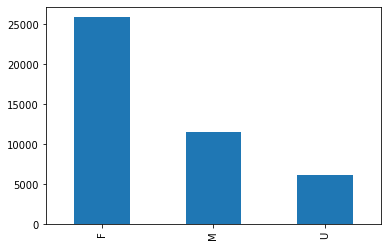

In [208]:
df.SEX.value_counts().plot(kind="bar");

In [209]:
df["AGE_YRS"].value_counts()

66.00     853
65.00     848
4.00      748
67.00     736
60.00     663
         ... 
1.60        1
0.00        1
2.75        1
100.00      1
0.60        1
Name: AGE_YRS, Length: 141, dtype: int64

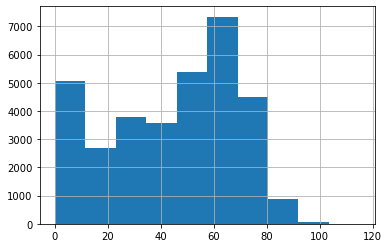

In [210]:
df["AGE_YRS"].hist();

In [211]:
df["CAGE_YR"].value_counts()

0.0      1316
1.0      1149
66.0      846
65.0      813
67.0      739
         ... 
117.0       1
106.0       1
99.0        1
109.0       1
101.0       1
Name: CAGE_YR, Length: 106, dtype: int64

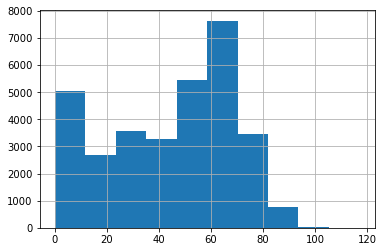

In [212]:
df["CAGE_YR"].hist()

In [213]:
# reported_death = df[df["DIED"] =='Y']

In [222]:
# Cross ta(ble of vaccinated-related deaths by state

death_by_state = pd.crosstab(df.STATE, df.DIED)
death_by_state

DIED,Y
STATE,
AL,2
AR,2
AZ,2
CA,12
CO,2
FL,10
GA,1
IA,2
IL,5


In [223]:
# Uppercase abbreviations before changing datatype
df.STATE = df.STATE.str.upper()

In [224]:
vaccine_death_data = pd.DataFrame.stack(death_by_state)
vaccine_death_data

STATE  DIED
AL     Y        2
AR     Y        2
AZ     Y        2
CA     Y       12
CO     Y        2
FL     Y       10
GA     Y        1
IA     Y        2
IL     Y        5
IN     Y        1
KS     Y        1
KY     Y        5
LA     Y        1
MA     Y        2
MD     Y        3
ME     Y        1
MI     Y        6
MO     Y        1
MT     Y        2
NC     Y        5
NE     Y        1
NJ     Y        2
NV     Y        3
NY     Y        5
Ne     Y        1
OH     Y        3
OR     Y        1
PA     Y        4
RI     Y        1
SC     Y        1
TN     Y        1
TX     Y        4
UT     Y        3
VA     Y        1
WA     Y        2
WI     Y        2
dtype: int64

In [225]:
print(f"In 2020, based on reported data. {len(death_by_state)} out of 50 states attributed a death related to vaccinations.")

In 2020, based on reported data. 36 out of 50 states attributed a death related to vaccinations.


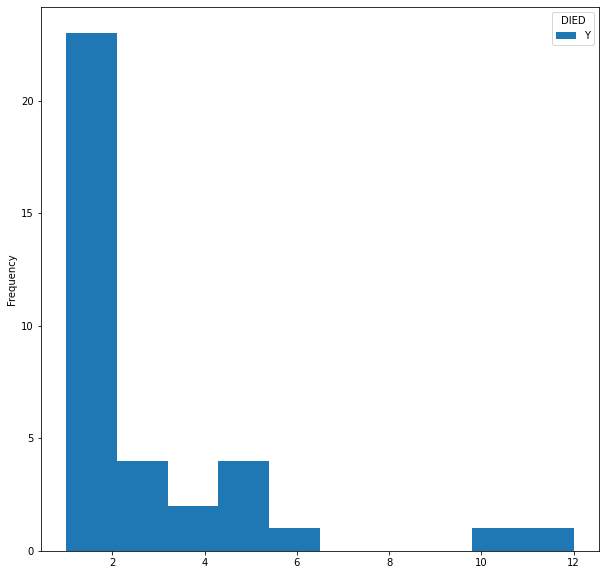

In [226]:
death_by_state.plot(kind="hist", figsize=(10,10));

### Map of vaccination deaths by state

In [357]:
# Create a file path to US States map
states = os.path.join('data', 'us-states.json')

In [358]:
df_vaccine_death = df.copy()

In [359]:
df_vaccine_death.dropna(subset=['DIED', 'STATE'], inplace=True)
df_vaccine_death.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
810,856068,01/10/2020,NE,NaN,NaN,NaN,U,NaN,died; Information has been received from a con...,Y,...,NaN,NaN,NaN,US0095075130912USA01166,2,01/10/2020,NaN,NaN,NaN,NaN
1331,856698,01/15/2020,VA,0.17,0.0,0.2,F,NaN,PARENT REPORTED INFANT DEATH. PATIENT WAS FOUN...,Y,...,NEWBORN RASH V/S ATOPIC ECZEMA V/S MILARIA RUB...,NONE,NaN,NaN,2,01/15/2020,NaN,NaN,NaN,NO KNOWN DRUG ALLERIES
1513,856929,01/16/2020,AZ,75.00,75.0,NaN,F,01/16/2020,"Initial weakness, paralysis of extremities, Gu...",Y,...,None,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1636,857105,01/17/2020,FL,75.00,75.0,NaN,M,NaN,PATIENT PASSED AWAY 2 DAYS AFTER RECEIVING VAC...,Y,...,NaN,NaN,NaN,NaN,2,01/17/2020,NaN,NaN,NaN,NaN
1644,857115,01/17/2020,MT,1.08,1.0,0.1,F,NaN,"Patient arrived to hospital by EMS, CPR in pro...",Y,...,None,None,NaN,NaN,2,01/17/2020,NaN,NaN,NaN,NKDA


In [360]:
df_vaccine_death.dropna(axis=1, inplace=True)
df_vaccine_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 810 to 43562
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   VAERS_ID      101 non-null    int64 
 1   RECVDATE      101 non-null    object
 2   STATE         101 non-null    object
 3   SEX           101 non-null    object
 4   SYMPTOM_TEXT  101 non-null    object
 5   DIED          101 non-null    object
 6   V_ADMINBY     101 non-null    object
 7   FORM_VERS     101 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 7.1+ KB


In [361]:
df_vaccine_death['STATE'] = df_vaccine_death['STATE'].astype(str)

In [362]:
df_vaccine_death['DIED'] = df_vaccine_death['DIED'].replace('Y', 0)

In [363]:
df_vaccine_death.head()

,VAERS_ID,RECVDATE,STATE,SEX,SYMPTOM_TEXT,DIED,V_ADMINBY,FORM_VERS
810,856068,01/10/2020,NE,U,died; Information has been received from a con...,0,UNK,2
1331,856698,01/15/2020,VA,F,PARENT REPORTED INFANT DEATH. PATIENT WAS FOUN...,0,MIL,2
1513,856929,01/16/2020,AZ,F,"Initial weakness, paralysis of extremities, Gu...",0,UNK,1
1636,857105,01/17/2020,FL,M,PATIENT PASSED AWAY 2 DAYS AFTER RECEIVING VAC...,0,PHM,2
1644,857115,01/17/2020,MT,F,"Patient arrived to hospital by EMS, CPR in pro...",0,PVT,2


In [364]:
df_vaccine_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 810 to 43562
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   VAERS_ID      101 non-null    int64 
 1   RECVDATE      101 non-null    object
 2   STATE         101 non-null    object
 3   SEX           101 non-null    object
 4   SYMPTOM_TEXT  101 non-null    object
 5   DIED          101 non-null    int64 
 6   V_ADMINBY     101 non-null    object
 7   FORM_VERS     101 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.1+ KB


In [365]:
m = folium.Map(location=[34, -99], zoom_start=3)
folium.Choropleth(
   geo_data=states,
    name="choropleth",
    data=df_vaccine_death,
    columns=["STATE", "DIED"],
    key_on='feature.id',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Vaccinated Related Deaths",
)
folium.LayerControl().add_to(m)
m

In [288]:
# Create a copy of the dataframe for manipulation
df_vaers = df.copy()

### Parse columns with dates

In [19]:
# list columns that are objects 
for label, content in df_vaers.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

RECVDATE
STATE
SEX
RPT_DATE
SYMPTOM_TEXT
DIED
DATEDIED
L_THREAT
ER_VISIT
HOSPITAL
X_STAY
DISABLE
RECOVD
VAX_DATE
ONSET_DATE
LAB_DATA
V_ADMINBY
V_FUNDBY
OTHER_MEDS
CUR_ILL
HISTORY
PRIOR_VAX
SPLTTYPE
TODAYS_DATE
BIRTH_DEFECT
OFC_VISIT
ER_ED_VISIT
ALLERGIES


In [20]:
# Convert columns into dates

df_vaers = pd.read_csv("data/2020VAERSDATA.csv", parse_dates=["RECVDATE", "RPT_DATE", "DATEDIED", "VAX_DATE", "ONSET_DATE", "TODAYS_DATE"])

In [21]:
df_vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      43588 non-null  int64         
 1   RECVDATE      43588 non-null  datetime64[ns]
 2   STATE         37643 non-null  object        
 3   AGE_YRS       33260 non-null  float64       
 4   CAGE_YR       31900 non-null  float64       
 5   CAGE_MO       2679 non-null   float64       
 6   SEX           43588 non-null  object        
 7   RPT_DATE      920 non-null    datetime64[ns]
 8   SYMPTOM_TEXT  43584 non-null  object        
 9   DIED          166 non-null    object        
 10  DATEDIED      93 non-null     datetime64[ns]
 11  L_THREAT      312 non-null    object        
 12  ER_VISIT      165 non-null    object        
 13  HOSPITAL      1583 non-null   object        
 14  HOSPDAYS      673 non-null    float64       
 15  X_STAY        27 non-null     object

### Convert strings to categories

In [23]:
# convert columns that contain strings to catergories

for label, content in df_vaers.items():
    if pd.api.types.is_string_dtype(content):
        df_vaers[label] = content.astype("category")

In [24]:
df_vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      43588 non-null  int64         
 1   RECVDATE      43588 non-null  datetime64[ns]
 2   STATE         37643 non-null  category      
 3   AGE_YRS       33260 non-null  float64       
 4   CAGE_YR       31900 non-null  float64       
 5   CAGE_MO       2679 non-null   float64       
 6   SEX           43588 non-null  category      
 7   RPT_DATE      920 non-null    datetime64[ns]
 8   SYMPTOM_TEXT  43584 non-null  category      
 9   DIED          166 non-null    category      
 10  DATEDIED      93 non-null     datetime64[ns]
 11  L_THREAT      312 non-null    category      
 12  ER_VISIT      165 non-null    category      
 13  HOSPITAL      1583 non-null   category      
 14  HOSPDAYS      673 non-null    float64       
 15  X_STAY        27 non-null     catego

In [25]:
df_vaers.STATE.cat.categories

Index(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MH', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')